## Generating Eccentric Injections using TEOBResumS WF model

In [1]:
#!/home/anuj.mishra/.conda/envs/TEOBResumS-cloned/bin/python

import numpy as np
import sys
sys.path.append('../src/')
import TEOBResumS_utils as ecc_gen

import matplotlib.pyplot as plt
    

In [2]:
sampling_frequency = 2048 # if None, it will be decided based on the binary mass and eccentricity value, either {2048, 4096}. 
f_start = 20.  # starting frequency of WF, i.e., (2,2) mode of the WF.
f_low = 20.    # Lower frequency from where SNR will be computed. It should satisfy the condition, f_start <= f_low, for it to make sense.
f_ref = 20.
f_high = None
init_pars = dict(f_start=f_start, f_low=f_low, f_high=f_high, f_ref=f_ref, sample_rate=sampling_frequency, ifo_list=['H1','L1','V1'])

cbc_pars = dict(mass_1=30, mass_2=20, chi1z=0., chi2z=0., 
              inclination=np.pi/6, coa_phase=0, polarization=0, ra=np.pi, dec=np.pi/4, 
              luminosity_distance=2000, trigger_time=1372294818,
              ecc=0.1)
psd_pars = dict(Noise=True, gen_seed=10, psd_L1='O4')
prms = {**init_pars, **cbc_pars, **psd_pars}
pars = ecc_gen.teobresums_pars_update(prms)
wfs_res = ecc_gen.sim_ecc_noisy_wf_gen_with_snr(**pars)

for k,i in wfs_res.items():
    print(k, ':', wfs_res[k] )

pure_polarized_wfs : {'hp': <pycbc.types.timeseries.TimeSeries object at 0x7f552cdddc00>, 'hc': <pycbc.types.timeseries.TimeSeries object at 0x7f552cdddab0>}
pure_ifo_signal : {'H1': <pycbc.types.timeseries.TimeSeries object at 0x7f552cddd420>, 'L1': <pycbc.types.timeseries.TimeSeries object at 0x7f552cdde3b0>, 'V1': <pycbc.types.timeseries.TimeSeries object at 0x7f552cdde410>}
noisy_ifo_signal : {'H1': <pycbc.types.timeseries.TimeSeries object at 0x7f552c1c80d0>, 'L1': <pycbc.types.timeseries.TimeSeries object at 0x7f552c1c80a0>, 'V1': <pycbc.types.timeseries.TimeSeries object at 0x7f552c1c8a60>}
psd : {'H1': <pycbc.types.frequencyseries.FrequencySeries object at 0x7f552cdde4d0>, 'L1': <pycbc.types.frequencyseries.FrequencySeries object at 0x7f55bf39fa60>, 'V1': <pycbc.types.frequencyseries.FrequencySeries object at 0x7f552cddf940>}
signal_templates : {'H1': <pycbc.types.timeseries.TimeSeries object at 0x7f552c1c88b0>, 'L1': <pycbc.types.timeseries.TimeSeries object at 0x7f552c1c9390>

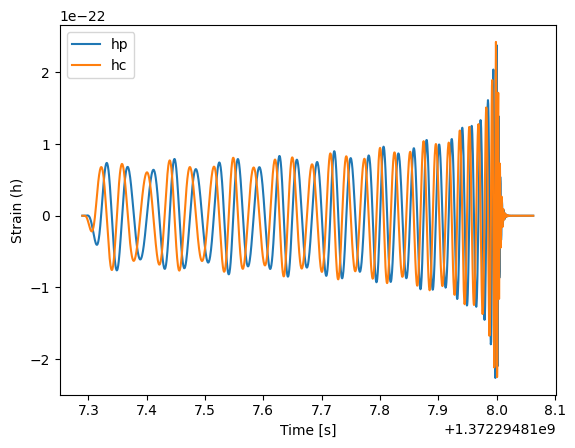

In [3]:
wf = wfs_res['pure_polarized_wfs']['hp']
plt.plot(wf.sample_times, wf, label='hp')
wf = wfs_res['pure_polarized_wfs']['hc']
plt.plot(wf.sample_times, wf, label='hc')
plt.xlabel('Time [s]')
plt.ylabel('Strain (h)')
plt.legend()
plt.show()

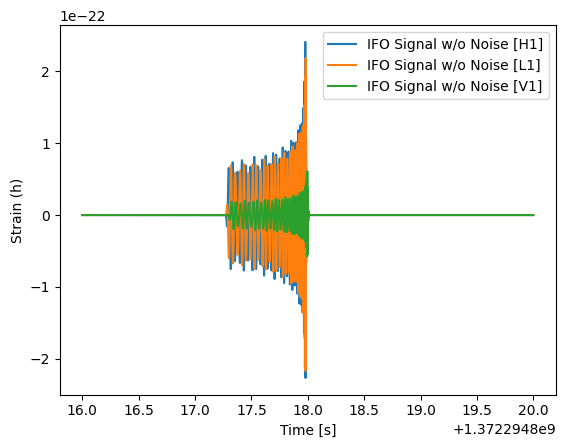

In [4]:
for k in wfs_res['pure_ifo_signal'].keys():
    wf = wfs_res['pure_ifo_signal'][k]
    plt.plot(wf.sample_times, wf, label='IFO Signal w/o Noise [%s]'%(k))
plt.xlabel('Time [s]')
plt.ylabel('Strain (h)')
plt.legend()
plt.show()

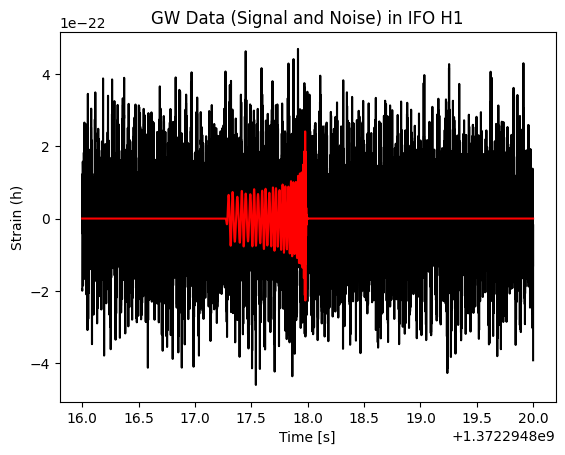

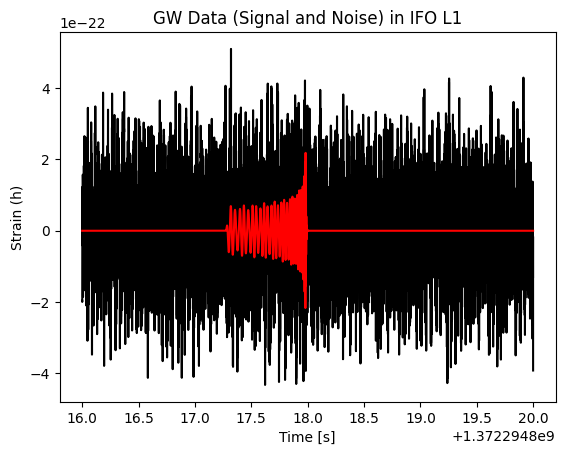

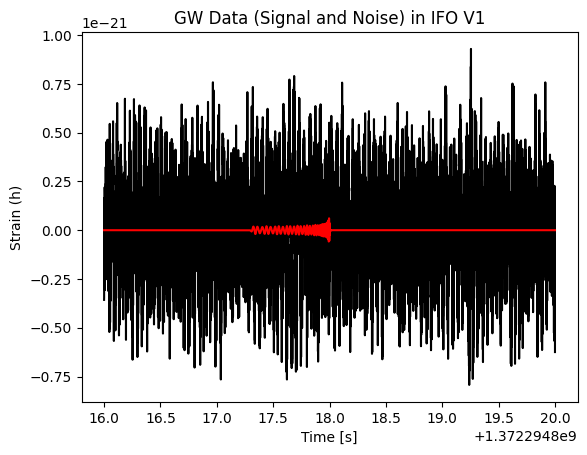

In [5]:
for k in wfs_res['pure_ifo_signal'].keys():
    wf = wfs_res['noisy_ifo_signal'][k]
    plt.plot(wf.sample_times, wf, color='black')
    wf = wfs_res['pure_ifo_signal'][k]
    plt.plot(wf.sample_times, wf, color='red')
    plt.xlabel('Time [s]')
    plt.ylabel('Strain (h)')
    plt.title('GW Data (Signal and Noise) in IFO %s'%(k))
    plt.show()